Para abrir o notebook no Google Colab, altere o domínio `github.com` para `githubtocolab.com`

# PSI3471 - Aula de Exercícios 03

# Neurônio de Rosenblatt no modo mini-batch

Neste exercício vamos utilizar o neurônio de Rosenblatt para implementar funções lógicas AND, OR e XOR.

Iniciamos importando as bibliotecas necessárias para implementar o neurônio de Rosenblatt.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Vamos gerar os dados de treinamento do problema começando pelo AND.

<div class="alert alert-block alert-success">
Complete o código a seguir:
</div>

In [3]:
Nt = 100  # número de pontos de treinamento

#############
# x deve ser uma matriz com Nt linhas e 2 colunas com valores 0 ou 1 aleatórios,
# que pode ser gerada usando as funções np.round e np.random.uniform.
# d deve ser um vetor coluna com Nt linhas contendo o resultado da função lógica
# AND aplicada ao vetor x. Para isso use a função np.logical_and.
# Note que a função np.logical_and devolve um vetor com elementos do tipo boolean.
# Para transformar os elementos para o tipo inteiro, basta multiplicá-lo por 1
# ou usar o método .astype(int)

x = np.round(np.random.uniform(low=0.0, high=1.0, size=(Nt, 2)), decimals = 0)

d = 1*(np.logical_and(x[:, 0], x[:, 1]))
d = np.reshape(d,(Nt,1))
#############

A função a seguir implementa o neurônio de Rosenblatt no modo mini-batch. Modifique o programa do algoritmo LMS no modo mini-batch do Exercício 2 inserindo a função de ativação.
Para obter 0 ou 1 na saída, deve-se usar a função degrau em vez da função sinal. Para isso, use a função np.heaviside.
Uma outra modificação que deve ser considerada é a inicialização dos pesos e bias, que agora devem ser inicializados com valores aleatórios uniformemente distribuídos no intervalo [-dw, dw].

<div class="alert alert-block alert-success">
Complete o código a seguir:
</div>

In [4]:
def Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb, dw):
    """
    W = Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb)
    x: sinal de entrada
    d: sinal desejado
    eta: passo de adaptação
    Nt: número de dados de treinamento
    Ne: número de épocas
    Nb: tamanho do mini-batch
    dw: inicialização dos pesos e bias com distribuição uniforme no invervalo [-dw, dw]
    """
    """
    Novamente, vamos juntar o sinal de entrada e o sinal desejado em um único vetor,
    uma vez que a cada época vamos embaralhar os dados.
    Ao fazer isso, já inserimos uma coluna de 1's para levar em conta o bias.
    """


    """
    PRECISO CONSERTAR ISSO
    Novamente, vamos juntar o sinal de entrada e o sinal desejado em um único vetor,
    uma vez que a cada época vamos embaralhar os dados.
    Ao fazer isso, já inserimos uma coluna de 1's para levar em conta o bias.
    """

    M = x.shape[1]
    Nmb = int(np.floor(Nt / Nb))
    W = np.random.uniform(low= - dw, high= dw, size= (Ne * Nmb + 1, M + 1))
    Xd = np.hstack((np.ones((Nt, 1)), x, d))

    # No modo mini-batch, o passo de adaptação é dividido por Nb
    eta = eta / Nb
    for k in range(Ne):
        np.random.shuffle(Xd)
        x = Xd[:, 0 : M + 1]
        d = Xd[:, [M + 1]]
        for l in range(Nmb):
            m = k * Nmb + l
            dmb = d[l * Nb : (l + 1) * Nb]
            xmb = x[l * Nb : (l + 1) * Nb, :]
            #############
            # Note que o índice k usado no site inicia em 1
            emb = dmb - np.heaviside(xmb @ W[[m], :].T, 1 )
            Gmb = xmb.T @ emb
            W[[m + 1], :] = W[[m], :] + (eta*xmb.T@emb).T
            #############

    #saida = W
    return W

In [6]:
eta = 0.5  # passo de adaptação do algoritmo de Rosenblatt
Nb = 20
Ne = 100
dw = 2
W = Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb, dw)

#############  Complete o código a seguir
# Wfinal deve ser os valores de pesos e bias da última iteração
Wfinal = W[500]
#############

print(Wfinal)

[-0.37535516  0.15136973  0.33839779]


<div class="alert alert-block alert-success">
Complete o código a seguir:
</div>

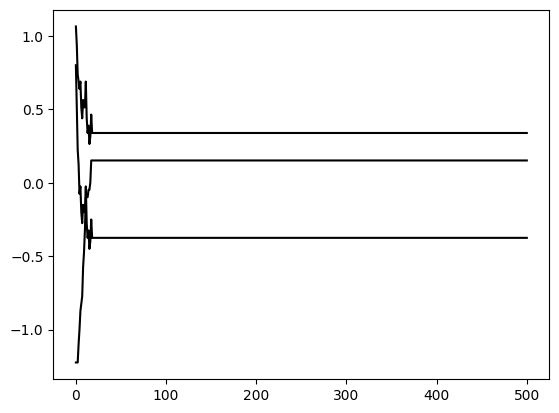

In [7]:
# Gere um gráfico para mostrar os pesos e bias ao longo das iterações
plt.plot(W, "k", label="LMS")

#plt.xlabel("iterações=épocas")
#plt.ylabel("pesos")
#plt.grid(axis="x", color="0.5")
#plt.grid(axis="y", color="0.5")
#plt.title(
#    "Pesos do mini-batch no modo batch (em preto)"
#)

<div class="alert alert-block alert-success">
Complete o código a seguir:
</div>

In [ ]:
# Gere os dados de teste, calcule a taxa de erro e gere a reta de separação das
# regiões, mostrando em um mesmo gráfico a reta e os dados de teste classificados.
# Comente o resultado, explicando se é possível utilizar o neurônio de Rosenblatt
# para implementar esta função lógica.




<div class="alert alert-block alert-success">
Complete o código a seguir:
</div>

In [ ]:
# Repita o exercício para o OR e o XOR.